Consider the data present in the Insurance dataset file.<br>
Following is the attribute related information:<br><br>

age: age of primary beneficiary<br>
sex: insurance contractor gender, female, male<br>
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
children: Number of children covered by health insurance / Number of dependents<br>
smoker: Smoking, yes or no<br>
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
charges: Individual medical costs billed by health insurance<br><br>

Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Create a dataframe named "data" from the given datafile and print it's head

In [2]:
data = pd.read_csv('datasets_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Understand the problem statement and the data, try understanding importance of each variable given.<br>
Perform Exploratory Data Analysis- print datatypes, dimension and descriptive statistics.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.shape

(1338, 7)

Check if there are missing values. If yes, handle them.

In [8]:
data.isna().sum().sum()

0

Check for Assumption 1- There should be no outliers in the data.<br>
Hint: Think logically, nothing needs to be worked upon here.
Convert Categorical variables to numerical- Sex, Smoker and Region Hint: Make use of replace function. Sex: Female-0,Male-1 Smoker: No-0, Yes-1 Region: northeast-0,northwest-1,southeast-2,southwest-3

Hint: df.Sex.replace({"Female":0,"Male":1}, inplace=True)

In [10]:
data.sex.replace({"female":0,"male":1}, inplace=True)
data.smoker.replace({"no":0,"yes":1}, inplace=True)
data.region.replace({"southwest":3,"northwest":1,"northeast":0,"southeast":2}, inplace=True)

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


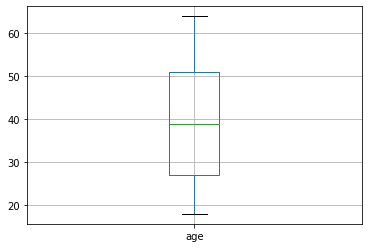

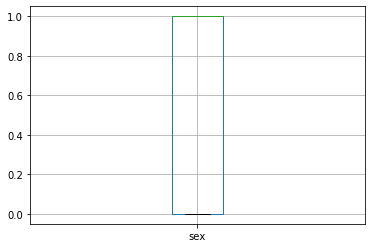

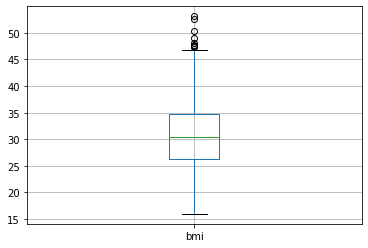

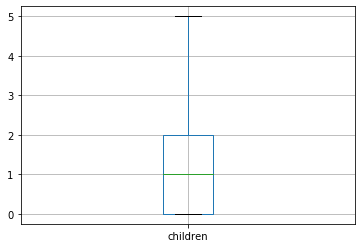

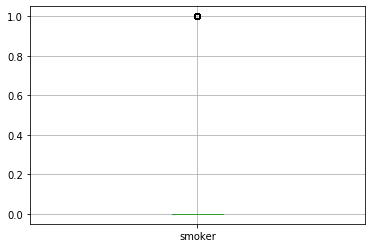

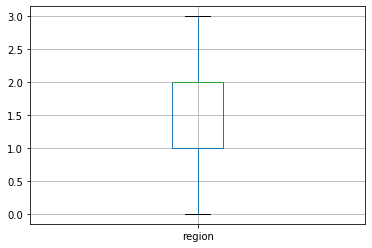

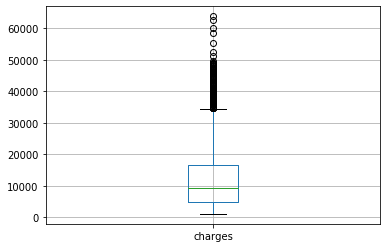

In [12]:
for i in data.columns:
    data.boxplot(column= i)
    plt.show()

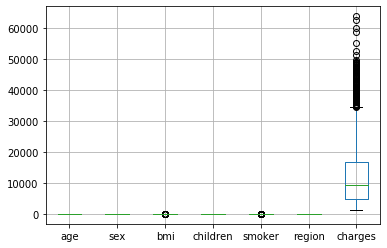

In [13]:
data.boxplot()

The columns bmi, smoker and charges have outliers

Check for Assumption 2-Assumption of Linearity<br>
Hint: Use kind="scatter" in the pairplot, because it wont be able to fit a line in categorical variables. Some might show no relationship, but remember they are categorical or important variables, leave it as it is.

In [16]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

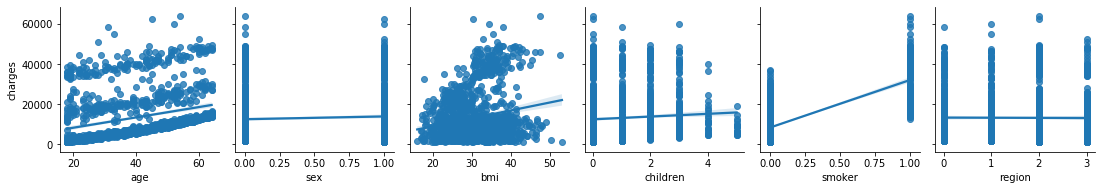

In [17]:
sns.pairplot(data,x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'],
            y_vars=['charges'],kind='reg')
plt.show()

Create X and Y

In [18]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [19]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [20]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Check for Assumption 3-Assumption of Normality <br>
Hint: You will find the data is highly positively skewed. So log transform the data.

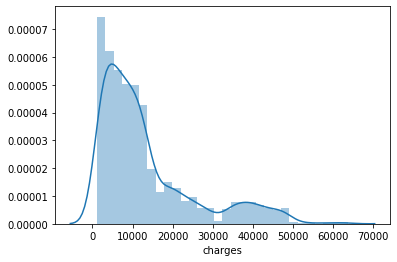

In [21]:
sns.distplot(y)
plt.show()

SINCE THE Y VARIABLE DOESNOT FOLLOW NORMAL DIST ,SO TRANSFORMED THE VARIABLE IN LOG TRANSFORM

In [22]:
# log transformation   
import numpy as np
y_log=np.log(y)

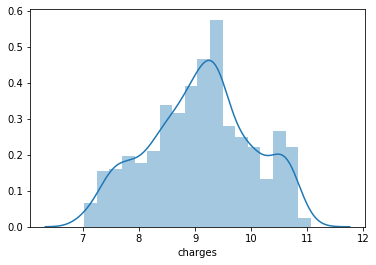

In [24]:
sns.distplot(y_log)
plt.show()

Convert Categorical variables to numerical- Sex, Smoker and Region<br>
Hint: Make use of replace function. <br>
Sex: Female-0,Male-1<br>
Smoker: No-0, Yes-1<br>
Region: northeast-0,northwest-1,southeast-2,southwest-3<br><br>
Hint: df.Sex.replace({"Female":0,"Male":1}, inplace=True)

In [ ]:
#DONE

Check for the normality in the X variables. <br>
Hint: Some variables make not look normal but realize that they are actually discrete valued.
    No transformation required.

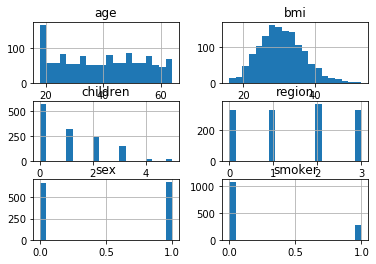

In [25]:
x.hist(bins=20)
plt.show()

In [26]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = x.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
x[data_num_skewed.index] = np.log1p(x[data_num_skewed.index])

age         0.055610
sex        -0.020928
bmi         0.283729
children    0.937328
smoker      1.463124
region     -0.038058
dtype: float64
children    0.937328
smoker      1.463124
dtype: float64


THE INDEPT VARIABLE CHILDREN AND SMOKER DOES NOT FOLLOW NORMAL DISTRIBUTION,SO TRANSFORMED THE VARIABLE IN LOG TRANSFORM

Check for Assumption 4-No multicollinearity in the data<br>
Try both the approaches-correlation and VIF.<br>
Hint: You will find no high correlation. VIF might be high for a few variables but do not eliminate them because they are important as per the domain knowledge.

               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109272  0.048406 -0.025019  0.002127
sex      -0.020856  1.000000  0.046371  0.016296  0.076185  0.004588
bmi       0.109272  0.046371  1.000000  0.016178  0.003750  0.157566
children  0.048406  0.016296  0.016178  1.000000  0.013245  0.013722
smoker   -0.025019  0.076185  0.003750  0.013245  1.000000 -0.002181
region    0.002127  0.004588  0.157566  0.013722 -0.002181  1.000000


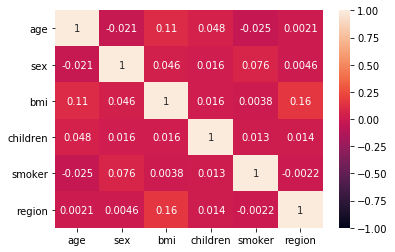

In [27]:
corr_df=x.corr(method="pearson")
print(corr_df)
 
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

WE HAVE FIND OUT THAT THE VARIABLE ARE NOT HIGHLY CORRELATED

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = x.columns
vif_df["VIF Factor"] = [vif(x.values, i) for i in range(x.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,age,7.57
1,sex,2.00
2,bmi,10.48
3,children,2.05
4,smoker,1.26
5,region,2.92


It can be seen that Age and BMI have high multicolinearity, while rest variables have less multicoliniarity. We will not eliminate Age and BMI as these varibales are important with repect to our problem.

In [29]:
#If require that these code will help to remove age and bmi
#x.drop(['age','bmi'],axis=1,inplace=True) cause imp for domain knowledge

Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [30]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(x,y_log, test_size=0.3, 
                                                    random_state=10)  

In [31]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(936, 6)
(402, 6)
(936,)
(402,)


## Building Linear Regression model

base Linear Regression model using sklearn.

In [32]:
from sklearn.linear_model import LinearRegression
# create a model object
lm = LinearRegression()
# train the model object
lm.fit(X_train,Y_train)


# print intercept and coeffficients
print(lm.intercept_)
print(lm.coef_)

7.026587688942717
[ 0.03514984 -0.07018994  0.01124633  0.21627907  2.25971013 -0.0418371 ]


In [33]:
# pair the feature names with the coefficeints
print(list(zip(x.columns,lm.coef_)))

[('age', 0.03514984024528931), ('sex', -0.07018993504473872), ('bmi', 0.011246326045052768), ('children', 0.2162790726201241), ('smoker', 2.2597101345088046), ('region', -0.0418371021986768)]


Predict using the model.

In [34]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)
print()

print(Y_pred.shape)

[ 8.89709422  8.55250231  9.47187895  9.3691116   8.29683782  8.97342189
  9.11538462  9.66398662  8.9968002  10.56738198  8.15741439  8.26420903
  8.76058275  9.14042954  9.26754882  9.36404645  8.35383534  9.79275662
  9.1753675  10.25319523 10.57178798  8.04790591  7.95523188  8.81882593
  8.46285596  9.41116348  9.03232496  9.42412704  8.43720343 10.23622618
  7.72141067 10.40264408  8.882177    8.989535    8.47991408  8.89818051
  9.43146545  9.07141831  9.09177918  8.9232356   9.57178053  9.19492257
  8.5407499   8.98344663  7.96809453  8.86354882  8.97417047 10.60984129
  9.30802258  9.2416099  10.03203939  8.29947487  8.94154368  9.6607996
  9.0882374   9.37191032  9.35045453  8.66512971  8.74583732 10.68667516
  7.87542634 10.64505312 11.06892811  7.94787143 10.03152745  8.85507259
  8.50592237  8.93733606  8.90685655  8.97406856  8.82008868  7.99306107
  8.89419076  8.92141744  9.02146752  9.36154545  8.54479781  8.80360543
  7.81211383  9.31803868  9.25938638  9.21980898  9.

In [35]:
new_df=pd.DataFrame()
new_df=X_test.copy()
 
new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred

In [36]:
new_df.head()

,age,sex,bmi,children,smoker,region,Actual sales,Predicted sales
7,37,0,27.740,1.386294,0.0,1,8.893093,8.897094
999,36,0,26.885,0.000000,0.0,1,8.569372,8.552502
1209,59,1,37.100,0.693147,0.0,3,9.421182,9.471879
491,61,0,25.080,0.000000,0.0,2,10.106963,9.369112
625,29,0,26.030,0.000000,0.0,1,8.225895,8.296838


In [37]:
new_df=new_df.reset_index().drop('index',axis=1)

Evaluate the model.

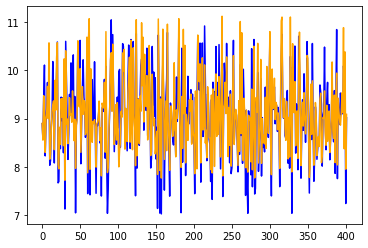

In [38]:
new_df['Actual sales'].plot(color='blue')
new_df['Predicted sales'].plot(color='orange')
plt.show()

In [39]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.739671631045358
RMSE: 0.4516458862389338
Adj R-square: 0.7384980997052168


As the R-squared value 0.7396 and the Adj R-squared value 0.7384 are very close and the RMS value 0.4516 is close to 1, it can be said that its a good model.

In [40]:
print(Y_test.min())
print(Y_test.max())

7.02275569117477
11.044406702204412


## Tuning the model

Performing Ridge and Lasso regression.


## 1. Applying RIDGE

In [41]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(x, y_log, test_size=0.3, 
                                                    random_state=10)  

In [42]:
from sklearn.linear_model import Ridge
# create a model object
rid = Ridge()
# train the model object
rid.fit(X_train,Y_train)

# print intercept and coeffficients
print(rid.intercept_)
print(rid.coef_)

7.030840357047282
[ 0.03514537 -0.06853678  0.01125423  0.21524995  2.22913665 -0.0419672 ]


In [43]:
Y_pred=rid.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.7400767456742868
RMSE: 0.4512943310201304
Adj R-square: 0.7389050405458464


R-squared value is 0.7400 and Adj R-square value is 0.7389 are very close by. The RMSE value is 0.4512 is close to 1. Therefore it is a good model.

## 2. Applying Lasso

In [44]:
from sklearn.linear_model import Lasso
# create a model object
las = Lasso()
# train the model object
las.fit(X_train,Y_train)


# print intercept and coeffficients
print(las.intercept_)
print(las.coef_)

7.8888757936390075
[ 0.03086241  0.          0.          0.          0.         -0.        ]


In [45]:
Y_pred=las.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.23329039397987605
RMSE: 0.7750911219799271
Adj R-square: 0.229834152329898


The R-squared is 0.2332 and Adj R-square 0.2289 values are very low and the RMSE value 0.7750 is very high. Therefore this is a bad model.

## Conclusion:
It can be concluded that the Ridge model gives the best result when compared with the base model. The Lasso model is showing a bad model.

Therefore for this problem Ridge model should be used.